In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
x=boston.data

In [11]:
y=boston.target

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=47)

In [13]:
x_train.shape

(473, 13)

In [14]:
y_train.shape

(473,)

In [15]:
x_test.shape

(33, 13)

In [16]:
y_test.shape

(33,)

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(x_train,y_train)

LinearRegression()

In [19]:
lm.score(x_train,y_train)

0.7378470698341897

In [20]:
lm.coef_

array([-1.14661824e-01,  4.98369714e-02,  4.23660965e-02,  2.76136172e+00,
       -1.92186847e+01,  3.82554685e+00, -2.90214488e-04, -1.49958046e+00,
        3.37781919e-01, -1.29391706e-02, -1.00532105e+00,  9.62700695e-03,
       -5.17754105e-01])

In [21]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

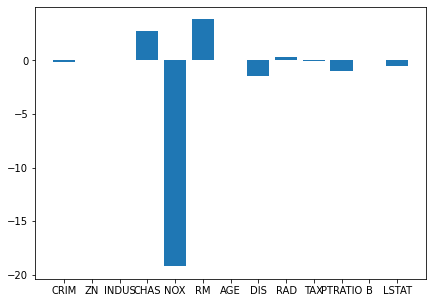

In [22]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,lm.coef_)
plt.show()

# Regularization:: L1 And L2 Regularization

L1-Lasso Regression

L2- Ridge Regression

In [23]:
from sklearn.linear_model import Lasso,Ridge

In [24]:
#x_train,x_test,Y_train,y_test

In [25]:
# will reduce the coefficient to zero(those features are not informative)
# alpha values could be --------> .0001,.001,.01,.1,1,10,---higher values recall all coefficients towards 0 and impact output
#default value of alpha = 1.0
# alpha =.01
ls=Lasso(alpha=.0001)
#ls=Lasso(alpha=1.0) ..... Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7378470275298743

In [26]:
ls.coef_

array([-1.14643751e-01,  4.98440527e-02,  4.22120469e-02,  2.75963205e+00,
       -1.91850291e+01,  3.82561821e+00, -3.14929827e-04, -1.49905342e+00,
        3.37700512e-01, -1.29419892e-02, -1.00491087e+00,  9.62885439e-03,
       -5.17800361e-01])

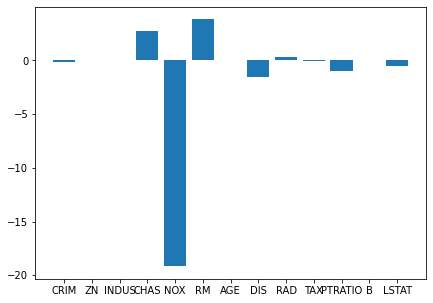

In [27]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,ls.coef_)
plt.show()

In [28]:
#try to minimise the coefficient variance
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7378470697713261

In [29]:
rd.coef_

array([-1.14661148e-01,  4.98372563e-02,  4.23599719e-02,  2.76134375e+00,
       -1.92173552e+01,  3.82555834e+00, -2.91384105e-04, -1.49956117e+00,
        3.37778538e-01, -1.29392713e-02, -1.00530449e+00,  9.62708063e-03,
       -5.17755161e-01])

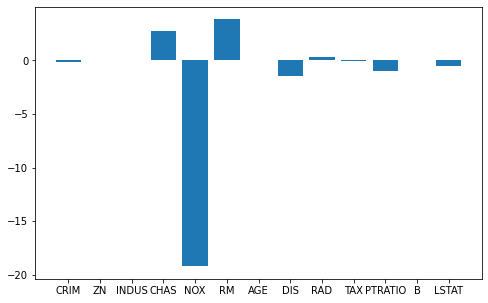

In [30]:
plt.figure(figsize=(8,5))
plt.bar(boston.feature_names,rd.coef_)
plt.show()

In [32]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet

enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7378432882335044


array([-1.14495594e-01,  4.99068125e-02,  4.08652043e-02,  2.75628611e+00,
       -1.88927362e+01,  3.82824316e+00, -5.74392031e-04, -1.49483009e+00,
        3.36955666e-01, -1.29640037e-02, -1.00126865e+00,  9.64505954e-03,
       -5.18023608e-01])

In [33]:
from sklearn.svm import SVR

In [35]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
pred_y

array([18.81384313, 32.06771391, 21.7676132 , 30.4789712 , 27.15660347,
       19.81329864, 23.79697156, 31.00295615, 29.89085817, 20.78886078,
       24.46888563, 28.16016595, 18.581473  , 25.9879294 , 27.23115989,
       11.28774859, 35.11909555, 15.83780523, 12.23069327, 15.99417648,
       33.04899479, 19.76657537, 37.65334831, 19.59270127, 27.01950042,
       16.87449549, 23.6123889 , 20.8590409 , 20.06200243, 25.88840592,
       14.17754685, 24.85345661, 16.27704383])

In [36]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
pred_y

array([24.44404902, 24.46577607, 19.61306104, 24.52375712, 23.94836618,
       19.69533765, 14.70012054, 22.06687986, 20.16259892, 17.66335259,
       22.75633794, 24.37811806, 19.80198523, 16.96637394, 20.13835911,
       20.6677709 , 24.43332616, 21.95404883, 15.10117828, 21.259198  ,
       23.56848744, 21.58239356, 22.02719362, 15.33263528, 23.03691669,
       13.16400874, 22.74426985, 22.34004809, 15.84076529, 23.99738954,
       20.95501035, 23.46468318, 17.83990377])

In [37]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
pred_y

array([23.65755064, 25.10035331, 18.20362794, 25.218185  , 23.89611484,
       18.89724177, 15.24485162, 23.01021817, 19.49965541, 16.00077687,
       24.07612762, 24.63113417, 18.80694609, 15.83291831, 19.34269727,
       20.16190029, 23.69813191, 21.4550389 , 15.12433833, 21.7610708 ,
       24.9178023 , 22.14942274, 22.25706779, 15.4951617 , 23.69093191,
       13.35206166, 23.00774403, 21.06968782, 15.57116657, 24.06336036,
       21.41643449, 23.61183902, 16.06003928])

In [38]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.6992480558822491
0.20116422682439916
0.20704264172793585
